In [102]:
import pandas as pd

In [103]:
df=pd.read_csv('people.txt')
df

,age,agegroup,height,status,yearsmarried
0,21,adult,6.0,single,-1
1,2,child,3.0,married,0
2,18,adult,5.7,married,20
3,221,elderly,5.0,widowed,2
4,34,child,-7.0,married,3


In [104]:
def ruleset(df):
    df['Rule 1']=df['age'].apply(lambda x:True if x>0 and x<150 else False)
    df['Rule 2']=df.apply(lambda x: True if x.age > x.yearsmarried else False,axis=1)
    df['Rule 3']=df['status'].apply(lambda x:x=='single' or x=='married' or x=='widowed')
    return df

In [105]:
df=ruleset(df)
df

,age,agegroup,height,status,yearsmarried,Rule 1,Rule 2,Rule 3
0,21,adult,6.0,single,-1,True,True,True
1,2,child,3.0,married,0,True,True,True
2,18,adult,5.7,married,20,True,False,True
3,221,elderly,5.0,widowed,2,False,True,True
4,34,child,-7.0,married,3,True,True,True


In [106]:
df['E']=df.apply(lambda x:x['Rule 1'] & x['Rule 2'] & x['Rule 3'], axis=1)
df

,age,agegroup,height,status,yearsmarried,Rule 1,Rule 2,Rule 3,E
0,21,adult,6.0,single,-1,True,True,True,True
1,2,child,3.0,married,0,True,True,True,True
2,18,adult,5.7,married,20,True,False,True,False
3,221,elderly,5.0,widowed,2,False,True,True,False
4,34,child,-7.0,married,3,True,True,True,True


In [107]:
rule_followed=df.iloc[:,5:].astype('int')
rule_followed

,Rule 1,Rule 2,Rule 3,E
0,1,1,1,1
1,1,1,1,1
2,1,0,1,0
3,0,1,1,0
4,1,1,1,1


In [108]:
print(rule_followed.describe())

         Rule 1    Rule 2  Rule 3         E
count  5.000000  5.000000     5.0  5.000000
mean   0.800000  0.800000     1.0  0.600000
std    0.447214  0.447214     0.0  0.547723
min    0.000000  0.000000     1.0  0.000000
25%    1.000000  1.000000     1.0  0.000000
50%    1.000000  1.000000     1.0  1.000000
75%    1.000000  1.000000     1.0  1.000000
max    1.000000  1.000000     1.0  1.000000


In [109]:
rule_followed['number of rules violated']=3-rule_followed.iloc[:,:-1].sum(axis=1)
rule_followed

,Rule 1,Rule 2,Rule 3,E,number of rules violated
0,1,1,1,1,0
1,1,1,1,1,0
2,1,0,1,0,1
3,0,1,1,0,1
4,1,1,1,1,0


<Axes: >

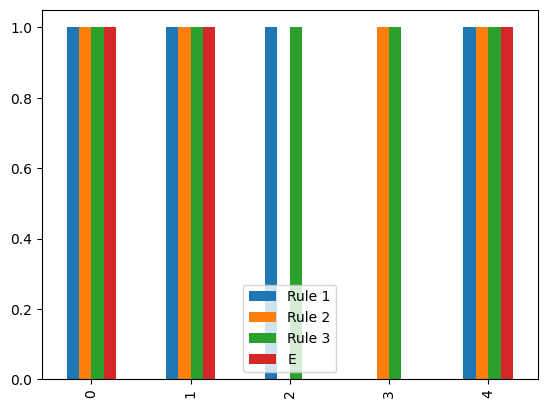

In [115]:
rule_followed.iloc[:,:-1].plot(kind='bar')